## Lab | Data cleaning and wrangling

Instructions
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

#### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


In [166]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis copy 2.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [167]:
data = data.set_index('Customer')

In [168]:
data.shape

(9134, 23)

In [169]:
data.columns = [data.columns[col_name].lower().replace(' ','_') for col_name in range(len(data.columns))]

In [170]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [171]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce') 
# Column 'effective_to_date' is not in the right format

In [172]:
data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [173]:
numericals = data.select_dtypes(np.number).round(2)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.52,56274,69,32,5,0,1,384.81
QZ44356,6979.54,0,94,13,42,0,8,1131.46
AI49188,12887.43,48767,108,18,38,0,2,566.47
WW63253,7645.86,0,106,18,65,0,7,529.88
HB64268,2813.69,43836,73,12,44,0,1,138.13


In [174]:
categoricals = data.select_dtypes(object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


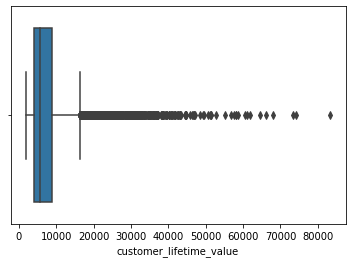

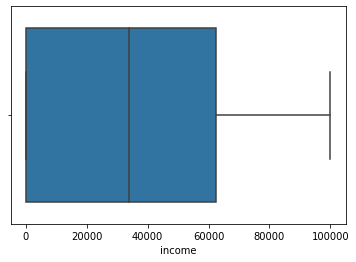

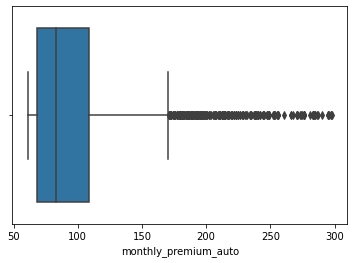

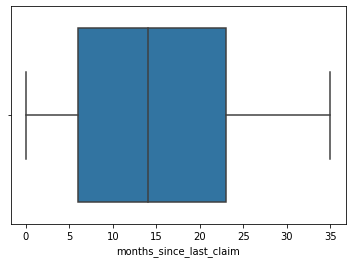

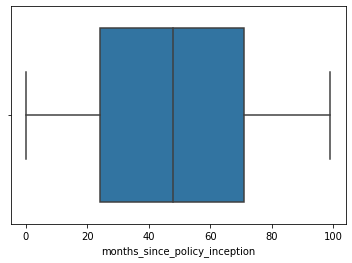

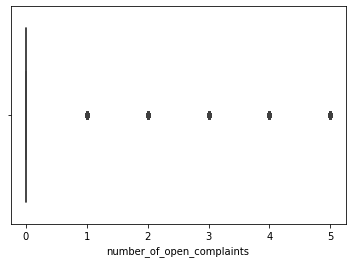

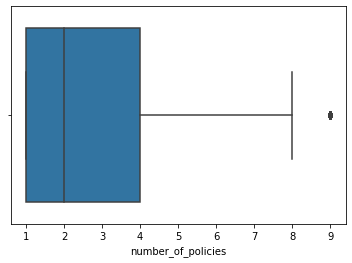

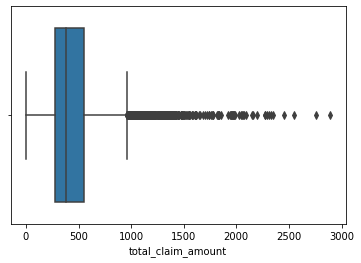

In [175]:
for col in numericals.columns:
    sns.boxplot(data[col])
    plt.show()

In [176]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(include='number').columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            data = data[(data[column]>=lower_limit) & (data[column]<=upper_limit)]
    return data

data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
monthly_premium_auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
months_since_last_claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
months_since_policy_inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
number_of_open_complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
number_of_policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
total_claim_amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


#### 2. Create a copy of the dataframe for the data wrangling.

In [177]:
data1 = data.copy()

In [178]:
data1 = remove_outliers(data1, threshold=2.5)

print(len(data1), "columns after removing outliers")
print(round((1-(len(data1)/len(data)))*100,1), "% of total data loss")

6664 columns after removing outliers
27.0 % of total data loss


In [179]:
print(len(data1), "initial columns")

data2 = remove_outliers(data1, threshold=1.5, in_columns=['income', 'monthly_premium_auto', 'total_claim_amount'])
# now filter the outliers on the more important columns with a tighter threshold

print(len(data2), "columns after removing outliers")
print(round((1-(len(data2)/len(data)))*100,1), "% of total data loss")

6664 initial columns
6389 columns after removing outliers
30.1 % of total data loss


#### 3. Normalize the continuous variables. You can use any one method you want.
#### 4. Encode the categorical variables
#### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [180]:
data2['day'] = data2['effective_to_date'].dt.day

data2['week'] = data2['effective_to_date'].dt.week

data2['month'] = data2['effective_to_date'].dt.month

data2.drop(['effective_to_date'], axis=1, inplace=True)

data2.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,week,month
Customer,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,4,1


In [181]:
data2["coverage"] = data2["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

data2["education"] = data2["education"].map({
    "High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})

data2["location_code"] = data2["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})

data2["vehicle_size"] = data2["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [182]:
y = data2['total_claim_amount'] 
X = data2.drop(['total_claim_amount'], axis=1)
X.head(1)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,month
Customer,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,0,2,Employed,F,56274,1,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1,24,8,2


In [183]:
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [184]:
encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [185]:
column_names = list(X_num.columns) # get list of numerical column names
column_names.extend(list(encoder.get_feature_names())) # add list of dummified categorical column names

X_numcat = np.concatenate([X_num, X_cat_encoded], axis=1)
X_= pd.DataFrame(data=X_numcat, index=X.index, columns=column_names)
X_.sample(5)

,customer_lifetime_value,coverage,education,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,day,week,month,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Married,x4_Single,x5_Personal Auto,x5_Special Auto,x6_Corporate L2,x6_Corporate L3,x6_Personal L1,x6_Personal L2,x6_Personal L3,x6_Special L1,x6_Special L2,x6_Special L3,x7_Offer2,x7_Offer3,x7_Offer4,x8_Branch,x8_Call Center,x8_Web,x9_SUV,x9_Sports Car,x9_Two-Door Car
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DV58197,8256.297800,0.0,2.0,62902.0,0.0,69.0,14.0,94.0,0.0,2.0,1.0,25.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
DC83427,17759.385750,0.0,0.0,0.0,1.0,63.0,10.0,19.0,0.0,2.0,0.0,10.0,6.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
RT69513,4774.751709,0.0,2.0,0.0,1.0,64.0,34.0,47.0,0.0,7.0,0.0,25.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ST27958,4386.277558,0.0,1.0,10621.0,1.0,67.0,28.0,22.0,0.0,5.0,1.0,11.0,6.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VV97308,7522.900704,0.0,0.0,55916.0,1.0,63.0,23.0,41.0,0.0,2.0,1.0,26.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [186]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6389 entries, BU79786 to Y167826
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        6389 non-null   float64
 1   coverage                       6389 non-null   float64
 2   education                      6389 non-null   float64
 3   income                         6389 non-null   float64
 4   location_code                  6389 non-null   float64
 5   monthly_premium_auto           6389 non-null   float64
 6   months_since_last_claim        6389 non-null   float64
 7   months_since_policy_inception  6389 non-null   float64
 8   number_of_open_complaints      6389 non-null   float64
 9   number_of_policies             6389 non-null   float64
 10  vehicle_size                   6389 non-null   float64
 11  day                            6389 non-null   float64
 12  week                           6389 non-null